#2015-07-22

##General Code:

Import Code:

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani
import scipy as sp

Load survey from xlsx file and print entries and columns:

In [3]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


Convenience function for finding column names:  pysentani.similar_columns(my_survey, 'search_term')

In [4]:
pysentani.similar_columns(survey,'PLN')

power_supply/PLN_grid
power_supply/PLN_microgrid
PLN_grid_year
PLN_grid_metered_y_n
PLN_grid_meter
PLN_grid_meter_reading
PLN_microgrid_year
PLN_microgrid_metered_y_n
PLN_microgrid_meter
PLN_microgrid_meter_reading
power_supply_working/PLN_grid
power_supply_working/PLN_microgrid
PLN_expenditure


## Data for Income Distribution:

###KDE Plot (Seaborn):

Notes: Shows density of data points with curve, Using log scale for data clarity - cannot accept NAs or Zeros

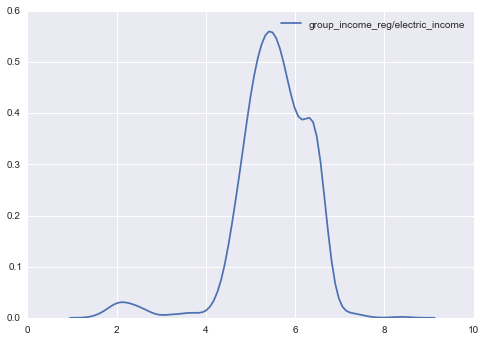

In [5]:
#Removes zeros from chosen column
income = survey[survey['group_income_reg/electric_income']>0]['group_income_reg/electric_income']
#Removes NAs, converts to log scale, and plots
sns.kdeplot(data=np.log10(income.dropna()))

###Box and Violin Plots (Seaborn):

Because I am using a logarithmic scale, it is necessary to remove NAs and zeros.  However I wanted to display the zeros, to make sure they are taken into account as outliers.  Therefore I used the .replace function to replace the zero values in the incomefreq column with ones, which appear as zeros on a logarithmic scale.  

In [6]:
survey['incomefreq'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['incomefreq'] = survey['incomefreq'].replace(0, 1)

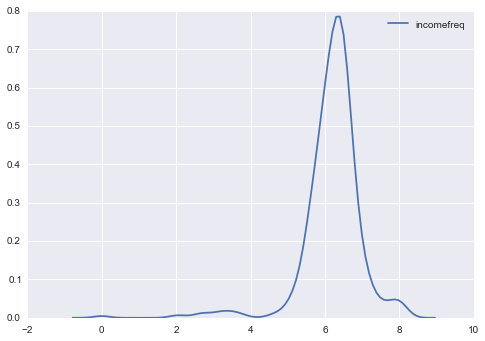

In [7]:
#Removes zeros from chosen column
#income = survey[survey['group_income_reg/electric_income']>0]['group_income_reg/electric_income']
#Removes NAs, converts to log scale, and plots
sns.kdeplot(data=np.log10(survey['incomefreq'].dropna()))

This code formats and displays a box plot which shows the income distribution by power access_type:

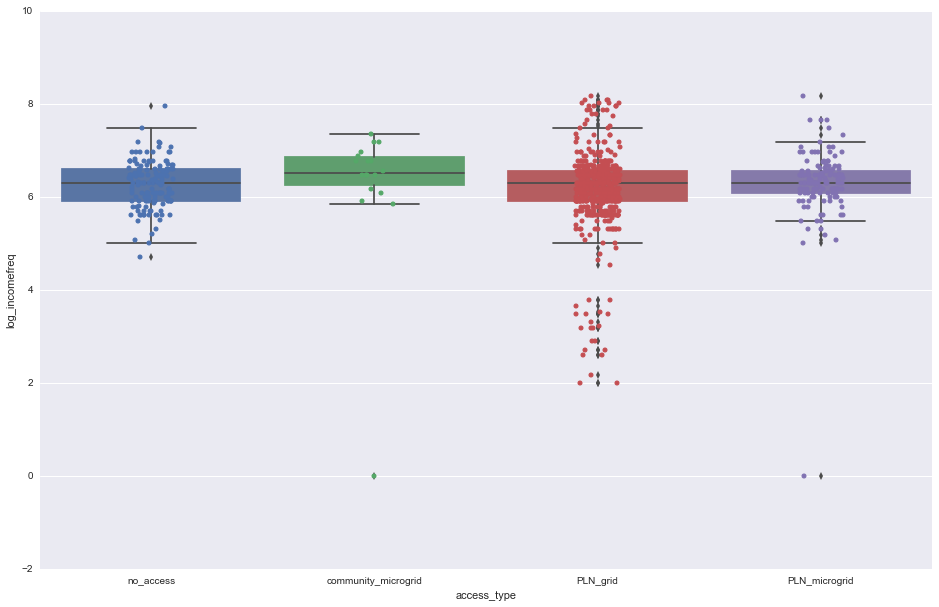

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
survey['log_incomefreq'] = np.log10(survey['incomefreq'])
box = sns.boxplot(x="access_type",y="log_incomefreq",data=survey)
jitter = sns.stripplot(x="access_type",y="log_incomefreq",data=survey,jitter=True,size=4)

This code displays a violin plot of the same data:

(The advantage of the violin plot is that it clearly shows - and allows easy comparison of - data point distribution)

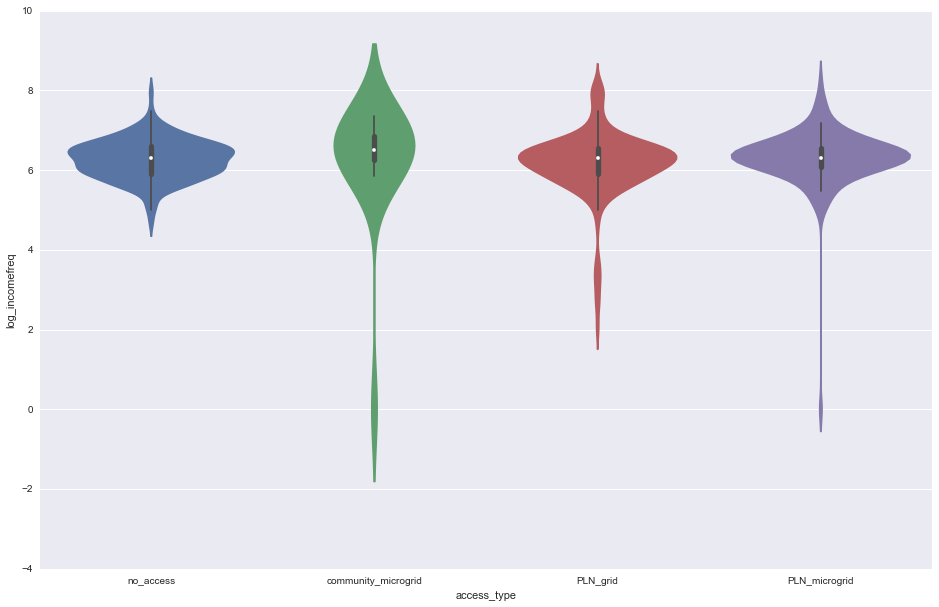

In [9]:
sns.violinplot(x="access_type",y="log_incomefreq",data=survey)

###Comparison of Mean Incomes W/ and W/out Zeros:

Notes: I was interested to see how much zero-values entered had affected the mean incomes (by access_type) so I did a comparison by using the .groupby function


####With Zeros and NAs

In [10]:
survey['incomefreq'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey.groupby('access_type')['incomefreq'].mean()

access_type
PLN_grid               6144277.136452
PLN_microgrid          5272740.740741
community_microgrid    5932777.777778
no_access              3616245.161290
Name: incomefreq, dtype: float64

####Without Zeros and NAs

In [11]:
incomefreq = pysentani.income_monthly(survey)
incomefreq = incomefreq[incomefreq >0]
survey['incomefreq'] = incomefreq.dropna()
survey['access_type'] = pysentani.access_type(survey)
survey.groupby('access_type')['incomefreq'].mean()

access_type
PLN_grid               6144277.136452
PLN_microgrid          5312089.552239
community_microgrid    6281764.705882
no_access              3616245.161290
Name: incomefreq, dtype: float64

###Willingness to Pay by Income:

####Monthly Rate:

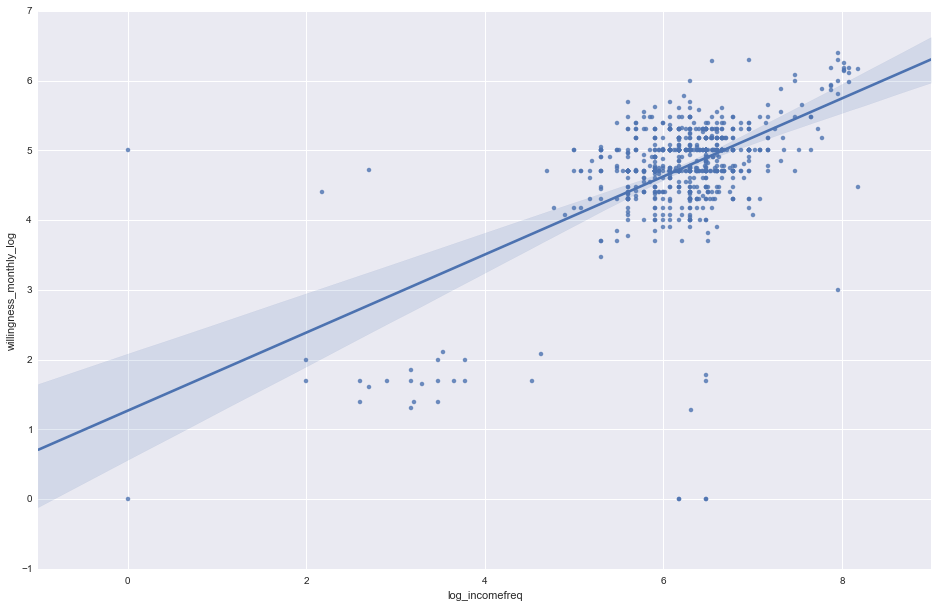

In [14]:
survey['willingness_monthly_log'] = np.log10(survey['willingness_monthly'].replace(0,1).dropna())
sns.regplot(x= "log_incomefreq",y="willingness_monthly_log",data=survey,scatter=True)

####Connection Fee:

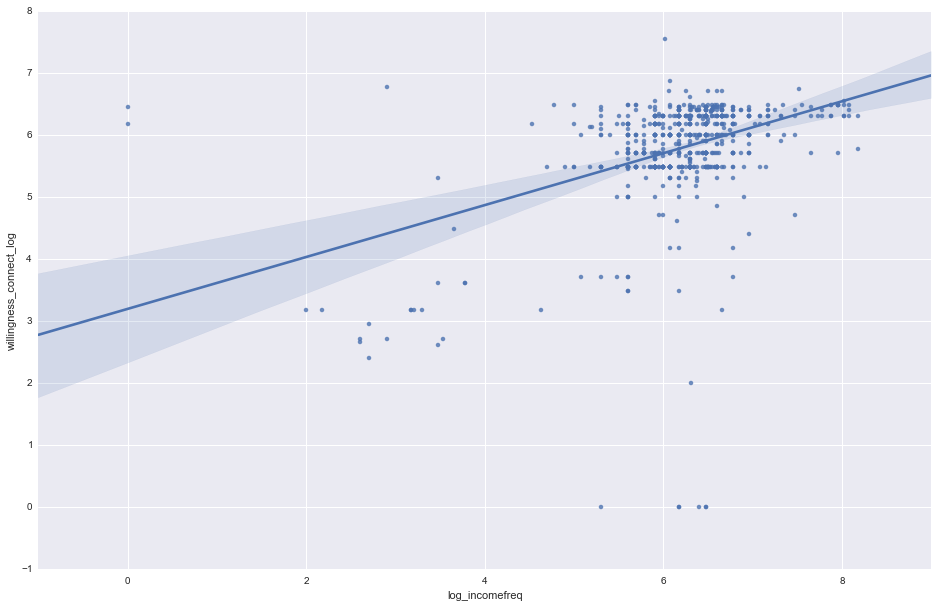

In [16]:
survey['willingness_connect_log'] = np.log10(survey['willingness_connect'].replace(0,1).dropna())

reg_connect = sns.regplot(x="log_incomefreq",y="willingness_connect_log",data=survey)

The code for these two plots can be generalized for continuous categories.